# Guia 2

## Ejercicio 1

Implemente el algorítmo de retropropagación para un perceptrón multicapa de forma que se pueda elegir libremente la cantidad de capas de la red y de neuronas en cada capa. Pruébelo entrenando una red de estructura apropiada para resolver el problema `XOR`, con sus particione de entrenamiento y prueba correspondientes (datos de la Guía de Trabajos Prácticos 1).

### Solucion

Los pasos para ajustar son:
- Prograpar entrada para calcular salida
- Calcular error
- Propagar patras calculando los deltas de cada neurona

Modelacion:
- Modelar cada capa como
    - un vector columna de entradas
    - una matriz de pesos
    - calculará el vector de salidas a partir de un vector de entradas y la matriz de pesos
    - Hay que agregarle noma el peso del bias

Bucle de entrenamiento:
    - forward: multiplicar la matriz de pesos por las entradas, te da la salida, que la usa la siguiente capa, etc. De aca sacamos los vectores de salida de cada capa
    - backward: calcular el delta de cada capa, desde la capa de salida pa'tras. De aca sacamos los vectores delta de cada capa.
    - actualizacion

error de training: 0.0


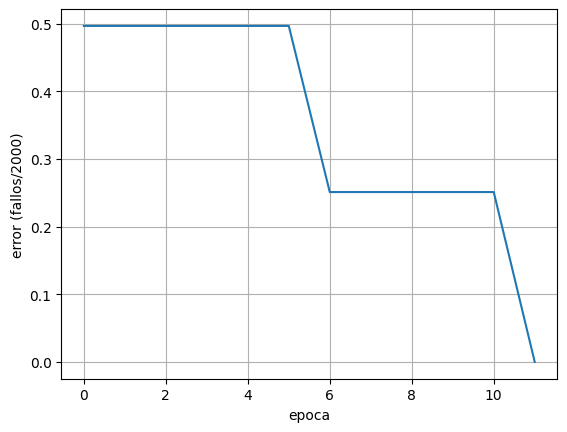

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PerceptronMulticapa

def cargarCSV(csvRelativePath, delimeter = ',') -> np.ndarray[any]:
    this_folder = os.path.abspath('') 
    fullPath = os.path.join(this_folder, csvRelativePath)
    return np.loadtxt(fullPath, dtype=float, delimiter=delimeter)

# ===== TRAINING =====
# leer archivos
trainFileXOR = cargarCSV('./data/XOR_trn.csv')
x = trainFileXOR[:,:-1]
yd = trainFileXOR[:,-1]

NNXOR = PerceptronMulticapa.PerceptronMulticapa(
    cant_entradas=x.shape[1],
    capas=[2,1],
    max_epocas=100,
    tasa_aprendizaje=0.01
)

trnErr = NNXOR.entrenar(
    x=x,
    yd=yd,
    targetError=0.1
)

print(f"error de training: {trnErr}")

# Graficar error
plt.grid()
plt.plot(NNXOR.error_history)
plt.xlabel('epoca')
plt.ylabel(f"error (fallos/{x.shape[0]})")
plt.show()

## Ejercicio 2

Utilice para entrenamiento y prueba los conjuntos de datos `concent_trn.csv` y `concent_tst.csv`, que consisten en dos clases distribuidas en forma concéntrica como muestra la Figura 1. Determine la estructura de una red de tipo perceptrón multicapa que resulte más apropiada para resolver este problema. Represente gráficamente, con diferentes colores, el resultado de la clasificación realizada por el perceptrón multicapa.

### Solución


## Ejercicio 3

_Iris_ es el género de una planta herbácea con flores que se utilizan en decoración. Dentro de este género existen muy diversas especies, entre las que se han estudiado: _Iris setosa_, _Iris versicolor_ e _Iris virginica_ (ver Figura 2).

Estas tres especies pueden distinguirse según las dimensiones de sus pétalos y sépalos. Un grupo de investigadores ha recopilado la información correspondiente a las longitudes y anchos de los pétalos y sépalos de 50 plantas de cada especie. En el archivo `iris81_trn.csv` se encuentra el conjunto de entrenamiento, y en `iris81_tst.csv` el de prueba, generado a partir de estas mediciones (en cm), junto con un código binario que indica la clase de cada meustra (Especie) reconocida por el grupo de investigadores ([-1, -1, 1] = _setosa_, [-1, 1, -1] = _versicolor_, [1, -1, -1] = _virginica_).

Determine la estructura óptima de un perceptrón multicapa para resolver este problema. Explore cómo varía el desempeño al usar distintas tasas de aprendizaje, y para cada caso grafique las curvas de error cuadrático total y error de clasificación en función de las épocas de entrenamiento.